Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**survival:    Survival
PassengerId: Unique Id of a passenger. 
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation
titanic_df.describe()**


In [9]:
#Aref - updated for Flight dataset 

In [10]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
# from sklearn import linear_model
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier

In [11]:
titanic_df = pd.read_csv("flights200-2.csv")


In [12]:
titanic_df.head

<bound method NDFrame.head of     flightdate  airline carrier origin  orignum  cancelled destination  \
0      4/17/14    20409      B6    ABQ        1        0.0         JFK   
1       4/6/14    19977      UA    AGS        2        0.0         ATL   
2       4/2/14    19977      UA    ANC        3        0.0         DEN   
3       4/1/14    19977      UA    ANC        3        0.0         DEN   
4      4/10/14    19977      UA    ANC        3        0.0         DEN   
5      4/12/14    19977      UA    ANC        3        0.0         DEN   
6      4/26/14    19977      UA    ANC        3        0.0         DEN   
7      4/30/14    19790      DL    ATL        4        0.0         BOS   
8      4/30/14    19393      WN    ATL        4        0.0         MSY   
9      4/30/14    20366      EV    ATL        4        0.0         CHA   
10      4/6/14    19790      DL    ATL        4        0.0         MSY   
11     4/13/14    19393      WN    ATL        4        0.0         STL   
12     4

In [13]:
titanic_df['cancelled']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     1.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
171    0.0
172    0.0
173    0.0
174    0.0
175    0.0
176    0.0
177    0.0
178    0.0
179    0.0
180    0.0
181    0.0
182    0.0
183    0.0
184    0.0
185    0.0
186    0.0
187    0.0
188    1.0
189    0.0
190    1.0
191    0.0
192    0.0
193    0.0
194    0.0
195    0.0
196    0.0
197    1.0
198    0.0
199    0.0
200    0.0
Name: cancelled, Length: 201, dtype: float64

In [17]:
#titanic_df['cancelled'] = titanic_df['cancelled'].map({'cancelyes': 1.0, 'cancelno': 0.0})
titanic_df.head

<bound method NDFrame.head of     flightdate  airline carrier origin  orignum  cancelled destination  \
0      4/17/14    20409      B6    ABQ        1        0.0         JFK   
1       4/6/14    19977      UA    AGS        2        0.0         ATL   
2       4/2/14    19977      UA    ANC        3        0.0         DEN   
3       4/1/14    19977      UA    ANC        3        0.0         DEN   
4      4/10/14    19977      UA    ANC        3        0.0         DEN   
5      4/12/14    19977      UA    ANC        3        0.0         DEN   
6      4/26/14    19977      UA    ANC        3        0.0         DEN   
7      4/30/14    19790      DL    ATL        4        0.0         BOS   
8      4/30/14    19393      WN    ATL        4        0.0         MSY   
9      4/30/14    20366      EV    ATL        4        0.0         CHA   
10      4/6/14    19790      DL    ATL        4        0.0         MSY   
11     4/13/14    19393      WN    ATL        4        0.0         STL   
12     4

In [39]:
data = titanic_df.drop(columns=["flightdate","origin",'carrier', 'destination', "depdelta", "arrtime", "arrdelta"])
data.sample(10)

,airline,orignum,cancelled,deptime,depdelay,arrdelayy
185,20355,34,0.0,6,0,21
99,19805,19,0.0,1,0,0
90,20409,18,0.0,5,10,9
193,20355,37,0.0,2,3,0
146,20304,27,1.0,0,0,0
86,20409,18,0.0,3,8,28
41,20366,11,1.0,0,0,0
125,20398,20,1.0,0,0,0
83,20437,18,0.0,2,7,0
178,19977,34,0.0,3,4,0


Mean Departure Delay


<Figure size 1224x720 with 0 Axes>

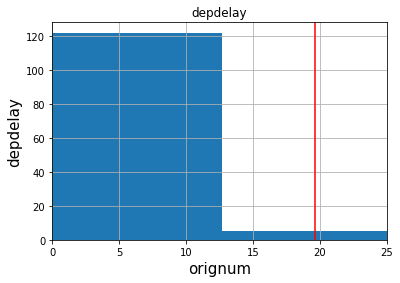

In [40]:
fig=plt.figure(figsize=(17,10))
data.hist(column="depdelay", bins=30)
plt.xlabel("orignum",fontsize=15)
plt.ylabel("depdelay",fontsize=15)
plt.xlim([0.0,25.0])
plt.axvline(data["orignum"].mean(), color="red")
print('Mean Departure Delay'.format(data["depdelay"].mean()))


In [41]:
data_nona = data["depdelay"].fillna(data["depdelay"].mean())
data["depdelay"]=data_nona
data.head(10)

,airline,orignum,cancelled,deptime,depdelay,arrdelayy
0,20409,1,0.0,4,5,2
1,19977,2,0.0,1,86,81
2,19977,3,0.0,3,4,21
3,19977,3,0.0,4,5,0
4,19977,3,0.0,4,5,0
5,19977,3,0.0,6,7,0
6,19977,3,0.0,6,7,22
7,19790,4,0.0,1,141,116
8,19393,4,0.0,2,122,109
9,20366,4,0.0,3,68,60


In [42]:
# data.info()

# Decision Tree Algorithm

In [43]:
target = data["cancelled"]
target_names = ["yes", "no"]

In [44]:
variable = data.drop("cancelled", axis=1)
feature_names = variable.columns
variable.head()

,airline,orignum,deptime,depdelay,arrdelayy
0,20409,1,4,5,2
1,19977,2,1,86,81
2,19977,3,3,4,21
3,19977,3,4,5,0
4,19977,3,4,5,0


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(variable, target, random_state=42)

In [46]:
# y_test is what the outcome is, and y_predict is what the decision tree predicts it. 
#y_test is the survive column entries, and X_test the rest of the columns or the 
# variables we think affect the survivie. 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test) 

1.0

In [47]:
y_predict = clf.predict(X_test)

# Random forest Algorithm

In [48]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(variable, target)
rf.score(variable, target)
# Have not done the cross validation

1.0

In [49]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([0.03523829, 0.01919695, 0.55732079, 0.31027505, 0.07796891])

In [50]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.5573207937674157, 'deptime'),
 (0.3102750500901851, 'depdelay'),
 (0.07796891212250856, 'arrdelayy'),
 (0.03523829000413173, 'airline'),
 (0.019196954015758782, 'orignum')]

# Support Vector Machine
With Radial-basis-function kernel

In [51]:
from sklearn.svm import SVC 
# using X_train, X_test, y_train, y_test
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
# compare y_predict to y_test

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [52]:
# if good prediction, what is y_predict - y_test = 0 

In [53]:
accuracy = model.score(X_test, y_test)
print(accuracy)

0.9215686274509803


In [54]:
# How do I assess accuracy
model.score(X_train, y_train)

1.0

# Support Vector Machine with Polynomial Kernel 

In [55]:
# from sklearn.svm import SVC 
# # using X_train, X_test, y_train, y_test
# model = SVC(kernel='pol')
# model.fit(X_train, y_train)
# y_predict = model.predict(X_test)
# # compare y_predict to y_test

In [56]:
# accuracy = model.score(X_test, y_test)
# print(accuracy)

In [57]:
# # How do I assess accuracy
# model.score(X_train, y_train)

# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
classifier.fit(X_train, y_train)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9666666666666667
Testing Data Score: 1.0


In [61]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head()

,Prediction,Actual
95,0.0,0.0
15,0.0,0.0
30,0.0,0.0
158,0.0,0.0
128,1.0,1.0


# K Nearest Neighbor

In [62]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(acc_knn)

98.67
